In [15]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [47]:
# Load the MATLAB files and flatten into spikes list
b_data = scipy.io.loadmat('bcounts.mat')
c_data = scipy.io.loadmat('ccounts.mat')
print(c_data.keys())

#b data
bb = b_data['spikes_count']
b_spikes = bb.flatten().tolist()

#c data
cc = c_data['spikes_count']
c_spikes = cc.flatten().tolist()

#d data



dict_keys(['__header__', '__version__', '__globals__', 'spikes2_count'])


In [51]:
import scipy.io

# Define syllables to process
syllables = ['b', 'c', 'd', 'g']
spike_counts = {}  # Dictionary to store results

# Loop through each syllable, load the .mat file, and flatten spike counts
for syllable in syllables:
    filename = f'{syllable}counts.mat'  # Construct filename dynamically
    try:
        data = scipy.io.loadmat(filename)  # Load .mat file
        spikes = data['spikes_count'].flatten().tolist()  # Extract and flatten
        spike_counts[syllable] = spikes  # Store in dictionary
        print(f"Loaded {filename}, {len(spikes)} spikes")
    except FileNotFoundError:
        print(f"File not found: {filename}")
    except KeyError:
        print(f"Key 'spikes_count' not found in {filename}")

# Example: Accessing b_spikes
b_spikes = spike_counts.get('b', [])
c_spikes = spike_counts.get('c', [])
d_spikes = spike_counts.get('d', [])
g_spikes = spike_counts.get('g', [])

print("Example b_spikes:", b_spikes[:10])  # Print first 10 values as a preview


Loaded bcounts.mat, 582 spikes
Loaded ccounts.mat, 863 spikes
Loaded dcounts.mat, 863 spikes
Loaded gcounts.mat, 760 spikes
Example b_spikes: [9, 8, 8, 5, 9, 10, 9, 8, 10, 6]


Comparing syllable b and g 

In [56]:
X = np.array(b_spikes + g_spikes).reshape(-1, 1)  # Convert to 2D array
y = np.array(['b'] * len(b_spikes) + ['g'] * len(g_spikes))  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=50, class_weight= 'balanced')
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Predict for a given spike count (e.g., 5)
spike_examples = np.array([[5], [20]])  # Convert to 2D array
predictions = clf.predict(spike_examples)

# Display predictions
for spike, pred in zip(spike_examples.flatten(), predictions):
    print(f"Prediction for {spike} spikes: {pred}")


Model Accuracy: 0.99
Prediction for 5 spikes: b
Prediction for 20 spikes: b


Chat gpt code extraploated from previous code chunk to calculate all the possible combos

In [62]:
import itertools

accuracies = []

for syll1, syll2 in itertools.combinations(syllables, 2):
    if syll1 in spike_counts and syll2 in spike_counts:
        # Prepare dataset
        X = np.array(spike_counts[syll1] + spike_counts[syll2]).reshape(-1, 1)
        y = np.array([syll1] * len(spike_counts[syll1]) + [syll2] * len(spike_counts[syll2]))

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

        # Train Random Forest model
        clf = RandomForestClassifier(n_estimators=100, random_state=50, class_weight='balanced')
        clf.fit(X_train, y_train)

        # Predict and evaluate accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((syll1, syll2, accuracy))
        
        print(f"Model Accuracy for {syll1} vs. {syll2}: {accuracy:.2f}")

# Convert accuracies to NumPy array
accuracy_array = np.array(accuracies, dtype=object)

# Display final results
print("\nFinal Accuracy Results:")
for syll1, syll2, acc in accuracy_array:
    print(f"{syll1} vs. {syll2}: {acc:.2f}")


Model Accuracy for b vs. c: 0.71
Model Accuracy for b vs. d: 0.79
Model Accuracy for b vs. g: 0.99
Model Accuracy for c vs. d: 0.70
Model Accuracy for c vs. g: 1.00
Model Accuracy for d vs. g: 0.88

Final Accuracy Results:
b vs. c: 0.71
b vs. d: 0.79
b vs. g: 0.99
c vs. d: 0.70
c vs. g: 1.00
d vs. g: 0.88


In [64]:
accuracy_array


array([['b', 'c', 0.71280276816609],
       ['b', 'd', 0.7889273356401384],
       ['b', 'g', 0.9888475836431226],
       ['c', 'd', 0.7023121387283237],
       ['c', 'g', 0.9969230769230769],
       ['d', 'g', 0.8830769230769231]], dtype=object)

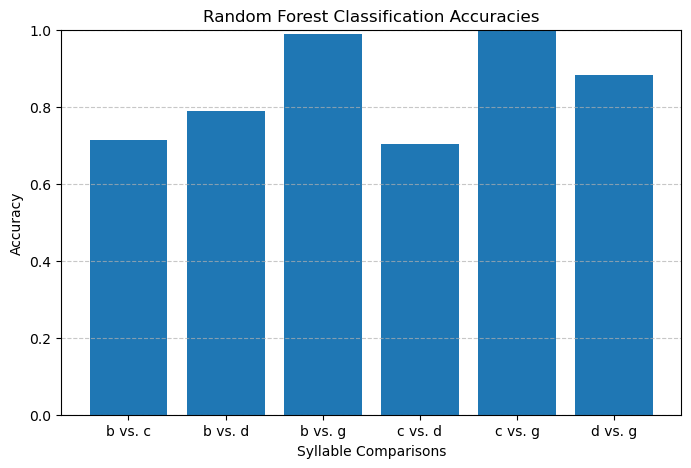

In [66]:
import matplotlib.pyplot as plt

labels = [f"{s1} vs. {s2}" for s1, s2, _ in accuracy_array]
accuracies = [acc for _, _, acc in accuracy_array]

# Create histogram
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies)

# Labeling
plt.xlabel("Syllable Comparisons")
plt.ylabel("Accuracy")
plt.title("Random Forest Classification Accuracies")
plt.ylim(0, 1)  # Accuracy range is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
